In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
# boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [6]:
print(os.getcwd())

C:\Users\jesus


In [7]:
# list the directories 
# os.listdir()

In [8]:
boston_df=pd.read_csv("C:\\Users\\jesus\\Downloads\\boston_housing.csv")

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

SyntaxError: invalid character '·' (U+00B7) (1705267211.py, line 1)

In [9]:
#1 boxplot --> MEDV -- Median value of owner-occupied homes

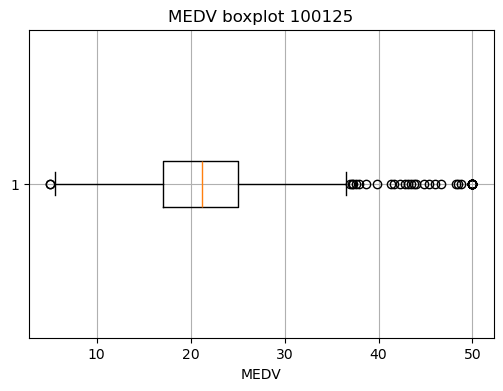

In [10]:
#1.1 Create the boxplot
plt.figure(figsize=(6,4))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('MEDV boxplot 100125')
plt.xlabel('MEDV')
plt.grid(True)
plt.show()

In [11]:
#2 bar plot --> Charles river 

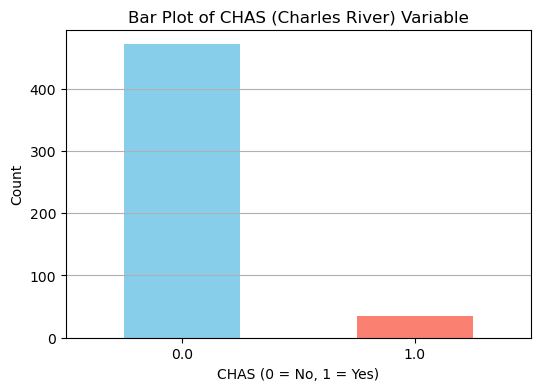

In [12]:
#2.1 Count values in 'CHAS'
chas_counts = boston_df['CHAS'].value_counts().sort_index()

#2.2 create the bar plot
plt.figure(figsize=(6, 4))
chas_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Bar Plot of CHAS (Charles River) Variable')
plt.xlabel('CHAS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [2]:
print('The values of homes closer to the river -> have a higher value than if far away from the river')

The values of homes closer to the river -> have a higher value than if far away from the river


In [20]:
#3 boxplot --> variable ' MEDV ' & ' AGE '
# split into 3 groups
# |_____> x <= 35
# |_____> 35 < x < 70
# |_____> x > 70

<Figure size 800x600 with 0 Axes>

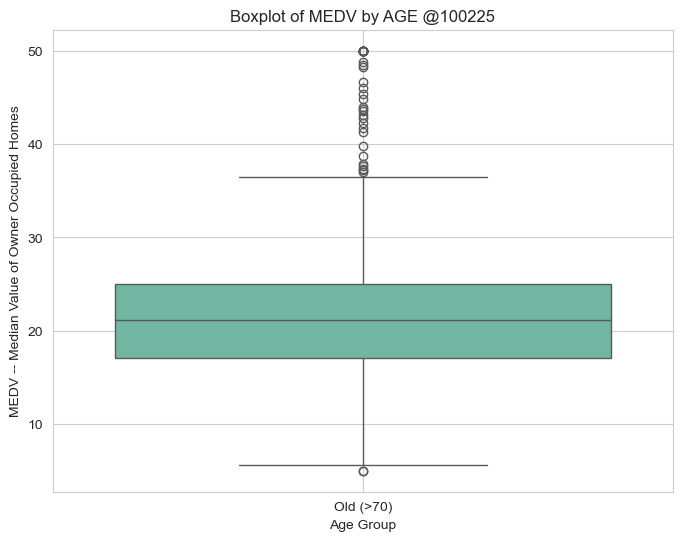

In [26]:
# Set white background
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6), facecolor='white')

# Create age group categories
def age_group(age):
    if age <= str(35):
        return 'Young (<=35)'
    elif age < str(70):
        return 'Middle (35-70)'
    else:
        return 'Old (>70)'

boston_df['AGE'] = boston_df['AGE'].apply(age_group)

#3.1 Create the boxplot
plt.figure(figsize=(8,6))

sns.boxplot(x='AGE', y='MEDV', hue='AGE', data=boston_df, palette='Set2', legend=False)

plt.title('Boxplot of MEDV by AGE @100225')
plt.xlabel('Age Group')
plt.ylabel('MEDV -- Median Value of Owner Occupied Homes')
plt.grid(True)
plt.legend([],[], frameon=False)

plt.show()


In [14]:
#4 scatter plot --> ' Nitric oxide concentrations ', ' non-retail business acres per town '

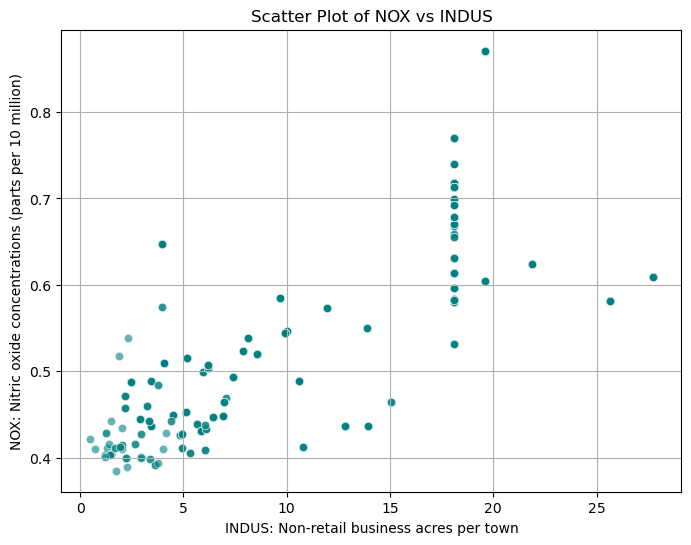

In [5]:
# Scatter plot: NOX vs INDUS
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='teal', alpha=0.6, edgecolors='w', linewidth=0.5)

# Labels and title
plt.xlabel('INDUS: Non-retail business acres per town')
plt.ylabel('NOX: Nitric oxide concentrations (parts per 10 million)')
plt.title('Scatter Plot of NOX vs INDUS')
plt.grid(True)

plt.show()


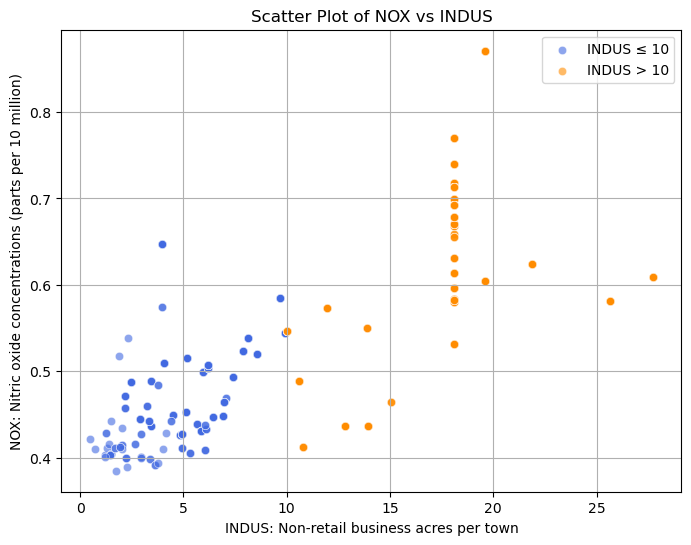

In [9]:
# Example: Split by whether INDUS is above or below 10
high_indus = boston_df[boston_df['INDUS'] > 10]
low_indus = boston_df[boston_df['INDUS'] <= 10]

plt.figure(figsize=(8, 6))

# Plot each group with a distinct color
plt.scatter(low_indus['INDUS'], low_indus['NOX'], color='royalblue', label='INDUS ≤ 10', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.scatter(high_indus['INDUS'], high_indus['NOX'], color='darkorange', label='INDUS > 10', alpha=0.6, edgecolors='w', linewidth=0.5)

# Labels and title
plt.xlabel('INDUS: Non-retail business acres per town')
plt.ylabel('NOX: Nitric oxide concentrations (parts per 10 million)')
plt.title('Scatter Plot of NOX vs INDUS')
plt.grid(True)
plt.legend()

plt.show()


In [10]:
print('So the scatter plot chart says, the more acres of INDUS, the more NOX gasses,')

so the chart says, the more acres of INDUS, the more NOX gasses,


In [12]:
# Calculate Pearson correlation
corr_coef, p_value = pearsonr(boston_df['INDUS'], boston_df['NOX'])

print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson correlation coefficient: 0.7637
P-value: 7.9134e-98


In [14]:
print('The correlation is saying that there is strong linear relationship\nbetween the INDUS acres going up & NOX increases')

The correlation is saying that there is strong linear relationship
between the INDUS acres going up & NOX increases


In [ ]:
#5 histogram --> ' pupil to teacher ' 

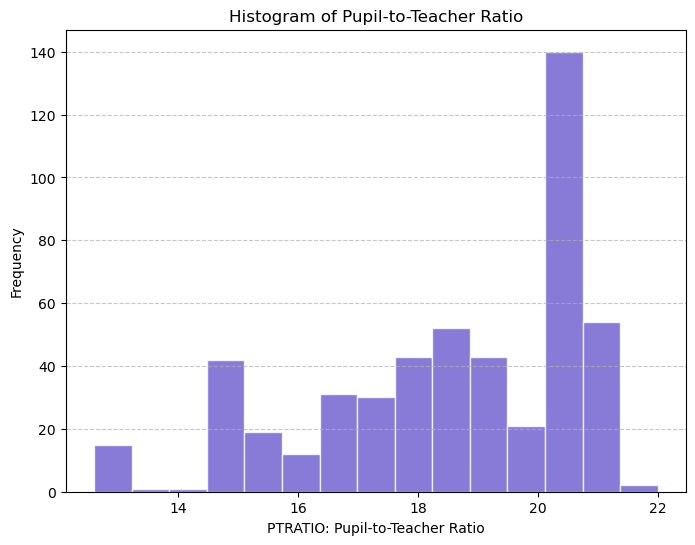

In [6]:
# Histogram: PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='slateblue', edgecolor='white', alpha=0.8)

# Labels and title
plt.xlabel('PTRATIO: Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [5]:
#6.1 --> Split MEDV by CHAS groups
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = ttest_ind(medv_chas0, medv_chas1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")       # -3.1133
print(f"P-value: {p_value:.4f}")          # .0036

T-statistic: -3.1133
P-value: 0.0036


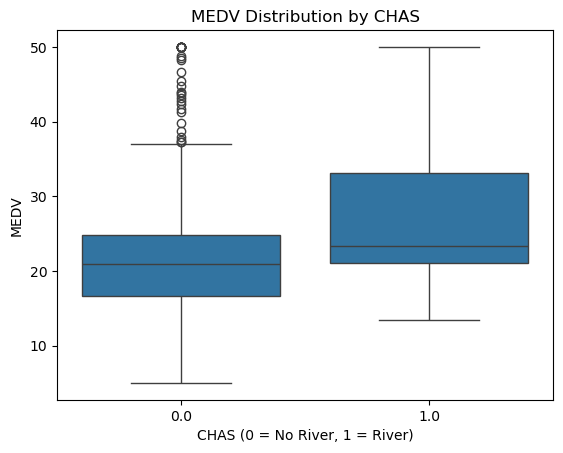

In [6]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('MEDV Distribution by CHAS')
plt.xlabel('CHAS (0 = No River, 1 = River)')
plt.ylabel('MEDV')
plt.show()

In [ ]:
# Median values near the river have a higher average value, than the ones not near the river

<Axes: xlabel='CHAS', ylabel='MEDV'>

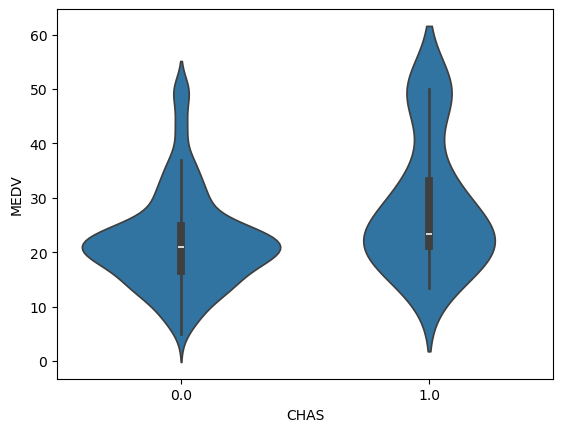

In [7]:
sns.violinplot(x='CHAS', y='MEDV', data=boston_df)

In [13]:
# Define bins and labels
bins = [0, 35, 70, 100]
labels = ['Newer Homes', 'Mid-Age Homes', 'Older Homes']

# Apply binning
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

In [16]:
# Group MEDV by AGE_group
groups = [boston_df[boston_df['AGE_group'] == label]['MEDV'] for label in labels]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.4076
P-value: 0.0000


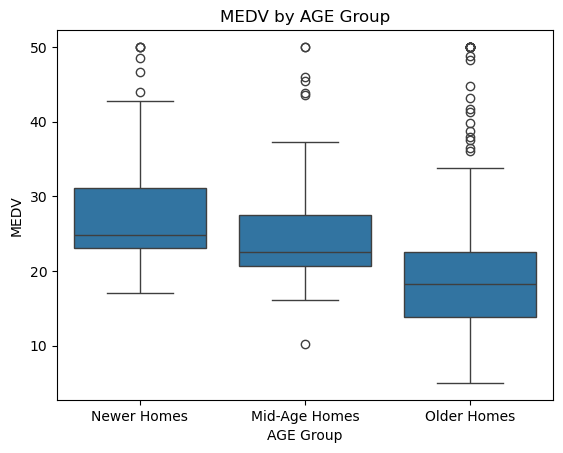

In [17]:
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('MEDV by AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

In [17]:
# Reshape DIS for sklearn
X = boston_df[['DIS']].values
y = boston_df['MEDV'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Regression equation: MEDV = {intercept:.2f} + {slope:.2f} * DIS")
print(f"R-squared: {r_squared:.4f}")

Regression equation: MEDV = 18.39 + 1.09 * DIS
R-squared: 0.0625


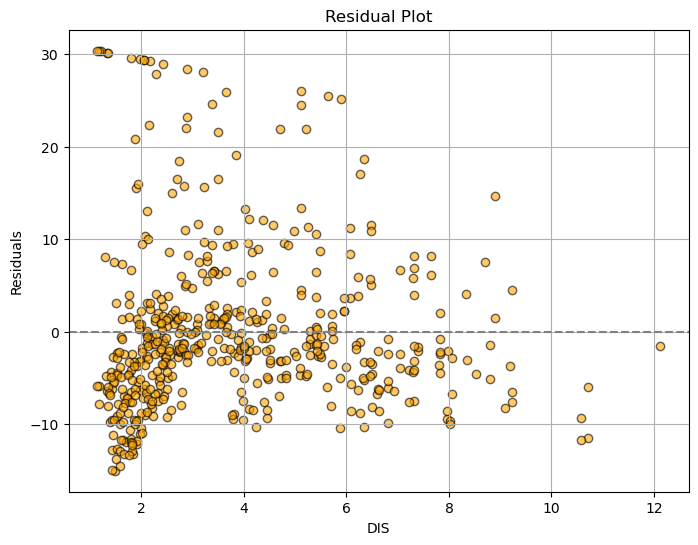

In [20]:
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='orange', alpha=0.6, edgecolors='k')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('DIS')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


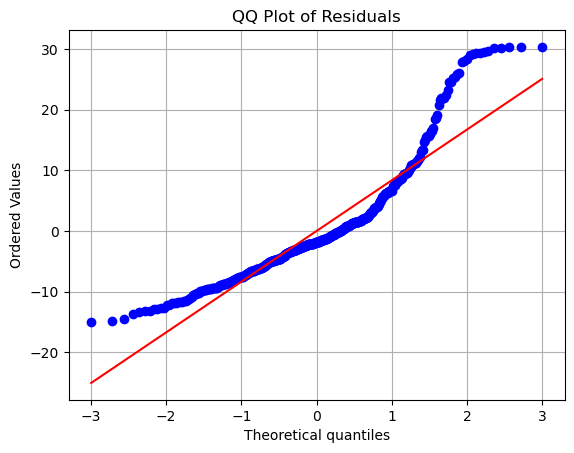

In [25]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()

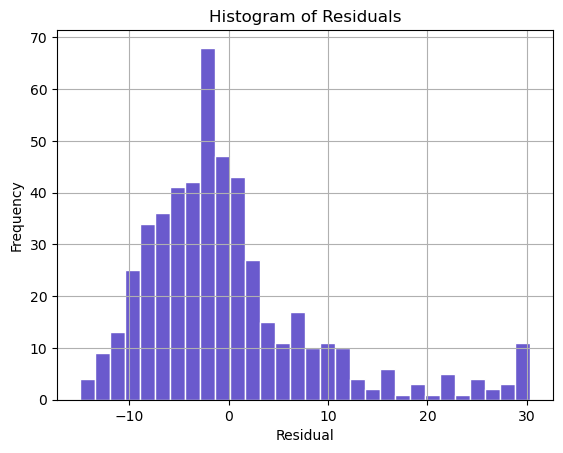

In [26]:
plt.hist(residuals, bins=30, color='slateblue', edgecolor='white')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [15]:
print('The correlation is saying that there is strong linear relationship\nbetween the INDUS acres going up & NOX increases')

The correlation is saying that there is strong linear relationship
between the INDUS acres going up & NOX increases


In [ ]:
#9
What is the impact of an additional DIS -- weighted distance to the five Boston employment centres,
on the MEDV --median value of owner occupied homes? (Regression analysis)
--> Regression equation: MEDV = 18.39 + 1.09 * DIS
--> R-squared: 0.0625
|___> Only 6.25% of the variation in home values (MEDV) is explained by distance to employment centers (DIS).
|___> 